In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('train.csv')

In [7]:
print("="*50)
print("TITANIC DATASET - INITIAL EXPLORATION")
print("="*50)

# Basic info about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Total passengers: {len(df)}")

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# Column information
print("\nDataset Info:")
print(df.info())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

TITANIC DATASET - INITIAL EXPLORATION
Dataset shape: (891, 12)
Total passengers: 891

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0

In [8]:
# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])


Missing Values:
          Missing Count  Missing Percentage
Age                 177           19.865320
Cabin               687           77.104377
Embarked              2            0.224467


In [9]:
print("\n" + "="*50)
print("DATA CLEANING")
print("="*50)

# Make a copy for cleaning
df_clean = df.copy()

# Handle missing values in 'Age'
print(f"Missing ages before cleaning: {df_clean['Age'].isnull().sum()}")

# Fill missing ages with median age by passenger class and gender
df_clean['Age'] = df_clean.groupby(['Pclass', 'Sex'])['Age'].transform(
    lambda x: x.fillna(x.median())
)

print(f"Missing ages after cleaning: {df_clean['Age'].isnull().sum()}")

# Handle missing values in 'Embarked'
print(f"Missing embarkation info: {df_clean['Embarked'].isnull().sum()}")
# Fill with most common port
mode_embarked = df_clean['Embarked'].mode()[0]
df_clean['Embarked'] = df_clean['Embarked'].fillna(mode_embarked)
print(f"Filled missing embarkation with: {mode_embarked}")

# Handle 'Cabin' - too many missing values, create a new feature instead
df_clean['Has_Cabin'] = df_clean['Cabin'].notna().astype(int)
print(f"Created 'Has_Cabin' feature: {df_clean['Has_Cabin'].value_counts()}")

# Create new features
# Family size
df_clean['Family_Size'] = df_clean['SibSp'] + df_clean['Parch'] + 1

# Extract title from names
df_clean['Title'] = df_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
title_counts = df_clean['Title'].value_counts()
rare_titles = title_counts[title_counts < 5].index
df_clean['Title'] = df_clean['Title'].replace(rare_titles, 'Rare')

# Age groups
df_clean['Age_Group'] = pd.cut(df_clean['Age'], 
                              bins=[0, 12, 18, 35, 60, 100], 
                              labels=['Child', 'Teen', 'Adult', 'Middle_Age', 'Senior'])

print("\nData cleaning completed!")
print(f"Final dataset shape: {df_clean.shape}")


DATA CLEANING
Missing ages before cleaning: 177
Missing ages after cleaning: 0
Missing embarkation info: 2
Filled missing embarkation with: S
Created 'Has_Cabin' feature: Has_Cabin
0    687
1    204
Name: count, dtype: int64

Data cleaning completed!
Final dataset shape: (891, 16)


In [ ]:
# =====================================
# 3. EXPLORATORY DATA ANALYSIS
# =====================================

print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Overall survival rate
survival_rate = df_clean['Survived'].mean()
print(f"Overall Survival Rate: {survival_rate:.2%}")

# Create visualizations
fig = plt.figure(figsize=(20, 15))

# 1. Survival by Gender
plt.subplot(3, 4, 1)
survival_by_sex = df_clean.groupby('Sex')['Survived'].mean()
survival_by_sex.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)

# 2. Survival by Passenger Class
plt.subplot(3, 4, 2)
survival_by_class = df_clean.groupby('Pclass')['Survived'].mean()
survival_by_class.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)

# 3. Age Distribution
plt.subplot(3, 4, 3)
plt.hist(df_clean['Age'], bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 4. Survival by Age Group
plt.subplot(3, 4, 4)
survival_by_age = df_clean.groupby('Age_Group')['Survived'].mean()
survival_by_age.plot(kind='bar', color='orange')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# 5. Family Size Distribution
plt.subplot(3, 4, 5)
df_clean['Family_Size'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 6. Survival by Family Size
plt.subplot(3, 4, 6)
survival_by_family = df_clean.groupby('Family_Size')['Survived'].mean()
survival_by_family.plot(kind='bar', color='pink')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)

# 7. Fare Distribution
plt.subplot(3, 4, 7)
plt.hist(df_clean['Fare'], bins=30, color='gold', alpha=0.7, edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# 8. Survival by Embarkation Port
plt.subplot(3, 4, 8)
survival_by_embarked = df_clean.groupby('Embarked')['Survived'].mean()
survival_by_embarked.plot(kind='bar', color='lightcyan')
plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)

# 9. Survival by Title
plt.subplot(3, 4, 9)
survival_by_title = df_clean.groupby('Title')['Survived'].mean()
survival_by_title.plot(kind='bar', color='salmon')
plt.title('Survival Rate by Title')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# 10. Correlation Heatmap
plt.subplot(3, 4, 10)
correlation_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Has_Cabin']
correlation_matrix = df_clean[correlation_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix')

# 11. Passenger Count by Class and Gender
plt.subplot(3, 4, 11)
class_gender_counts = df_clean.groupby(['Pclass', 'Sex']).size().unstack()
class_gender_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'])
plt.title('Passenger Count by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')

# 12. Survival Rate by Class and Gender
plt.subplot(3, 4, 12)
pivot_survival = df_clean.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
sns.heatmap(pivot_survival, annot=True, cmap='RdYlGn', cbar_kws={'label': 'Survival Rate'})
plt.title('Survival Rate by Class and Gender')

plt.tight_layout()
plt.show()

In [10]:
# =====================================
# 4. DETAILED ANALYSIS AND INSIGHTS
# =====================================

print("\n" + "="*50)
print("KEY INSIGHTS")
print("="*50)

# Gender analysis
print("1. GENDER ANALYSIS:")
gender_survival = df_clean.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])
gender_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(gender_survival)
print(f"Women were {gender_survival.loc['female', 'Survival_Rate'] / gender_survival.loc['male', 'Survival_Rate']:.1f}x more likely to survive than men")

# Class analysis
print("\n2. PASSENGER CLASS ANALYSIS:")
class_survival = df_clean.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
class_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(class_survival)

# Age analysis
print("\n3. AGE GROUP ANALYSIS:")
age_survival = df_clean.groupby('Age_Group')['Survived'].agg(['count', 'sum', 'mean'])
age_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(age_survival)

# Family size analysis
print("\n4. FAMILY SIZE ANALYSIS:")
family_survival = df_clean.groupby('Family_Size')['Survived'].agg(['count', 'sum', 'mean'])
family_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(family_survival)

# Combined analysis
print("\n5. COMBINED CLASS AND GENDER ANALYSIS:")
combined_analysis = df_clean.groupby(['Pclass', 'Sex'])['Survived'].agg(['count', 'sum', 'mean'])
combined_analysis.columns = ['Total', 'Survived', 'Survival_Rate']
print(combined_analysis)

# =====================================
# 5. SUMMARY STATISTICS
# =====================================

print("\n" + "="*50)
print("FINAL SUMMARY")
print("="*50)

print(f"Total passengers analyzed: {len(df_clean)}")
print(f"Overall survival rate: {df_clean['Survived'].mean():.1%}")
print(f"Average age: {df_clean['Age'].mean():.1f} years")
print(f"Average fare: ${df_clean['Fare'].mean():.2f}")
print(f"Most common embarkation port: {df_clean['Embarked'].mode()[0]}")
print(f"Passengers with cabin info: {df_clean['Has_Cabin'].sum()} ({df_clean['Has_Cabin'].mean():.1%})")

print("\nTop survival factors:")
print("1. Being female significantly increased survival chances")
print("2. Higher passenger class (1st class) had better survival rates") 
print("3. Children had higher survival rates than adults")
print("4. Small families (2-4 members) had better survival rates than solo travelers or very large families")
print("5. Having cabin information correlated with higher survival rates")

print("\nData cleaning completed:")
print("- Filled missing age values using median by class and gender")
print("- Filled missing embarkation data with most common port")
print("- Created new features: Family_Size, Title, Age_Group, Has_Cabin")
print("- Ready for further analysis or machine learning!")


KEY INSIGHTS
1. GENDER ANALYSIS:
        Total  Survived  Survival_Rate
Sex                                   
female    314       233       0.742038
male      577       109       0.188908
Women were 3.9x more likely to survive than men

2. PASSENGER CLASS ANALYSIS:
        Total  Survived  Survival_Rate
Pclass                                
1         216       136       0.629630
2         184        87       0.472826
3         491       119       0.242363

3. AGE GROUP ANALYSIS:
            Total  Survived  Survival_Rate
Age_Group                                 
Child          69        40       0.579710
Teen           70        30       0.428571
Adult         514       184       0.357977
Middle_Age    216        83       0.384259
Senior         22         5       0.227273

4. FAMILY SIZE ANALYSIS:
             Total  Survived  Survival_Rate
Family_Size                                
1              537       163       0.303538
2              161        89       0.552795
3         

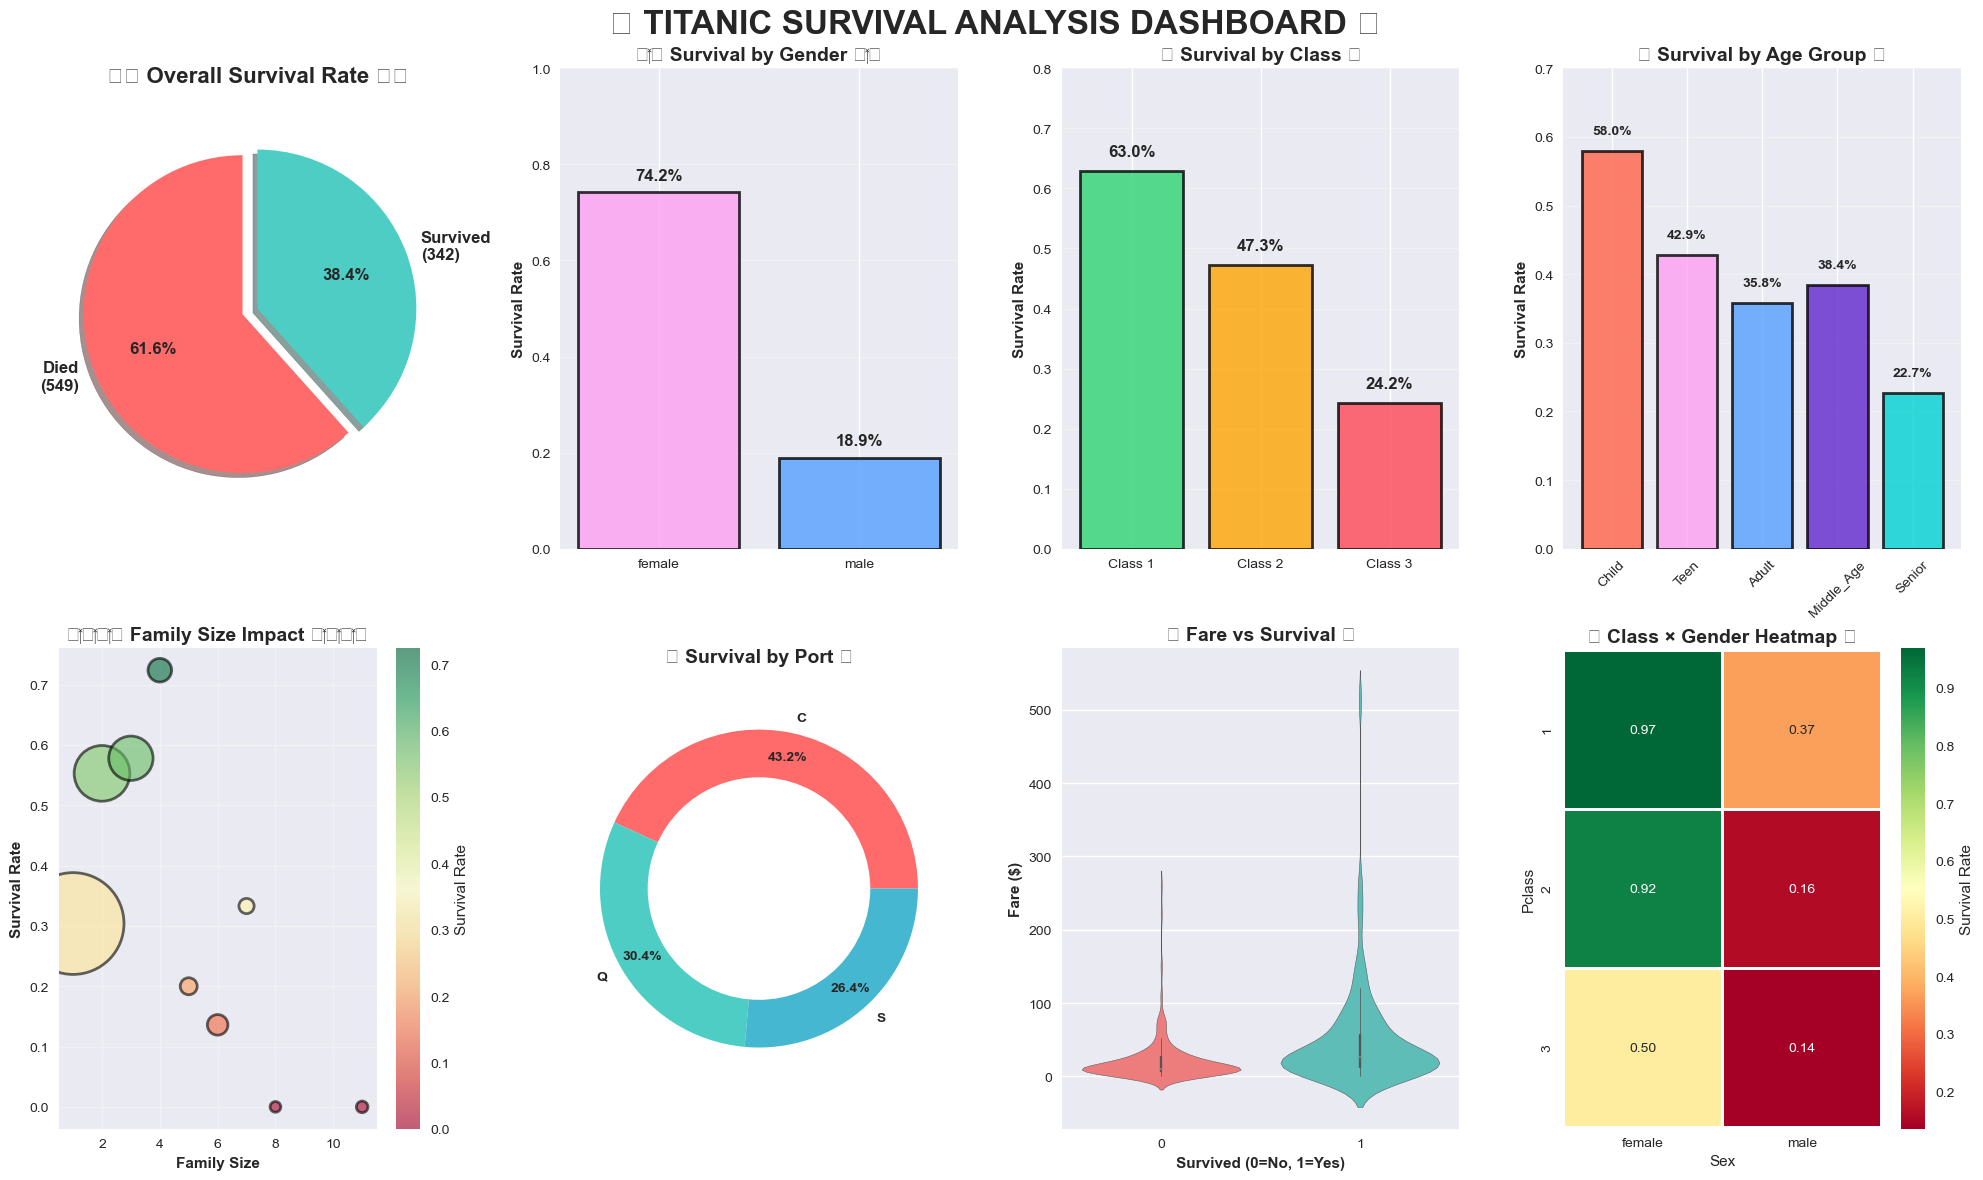

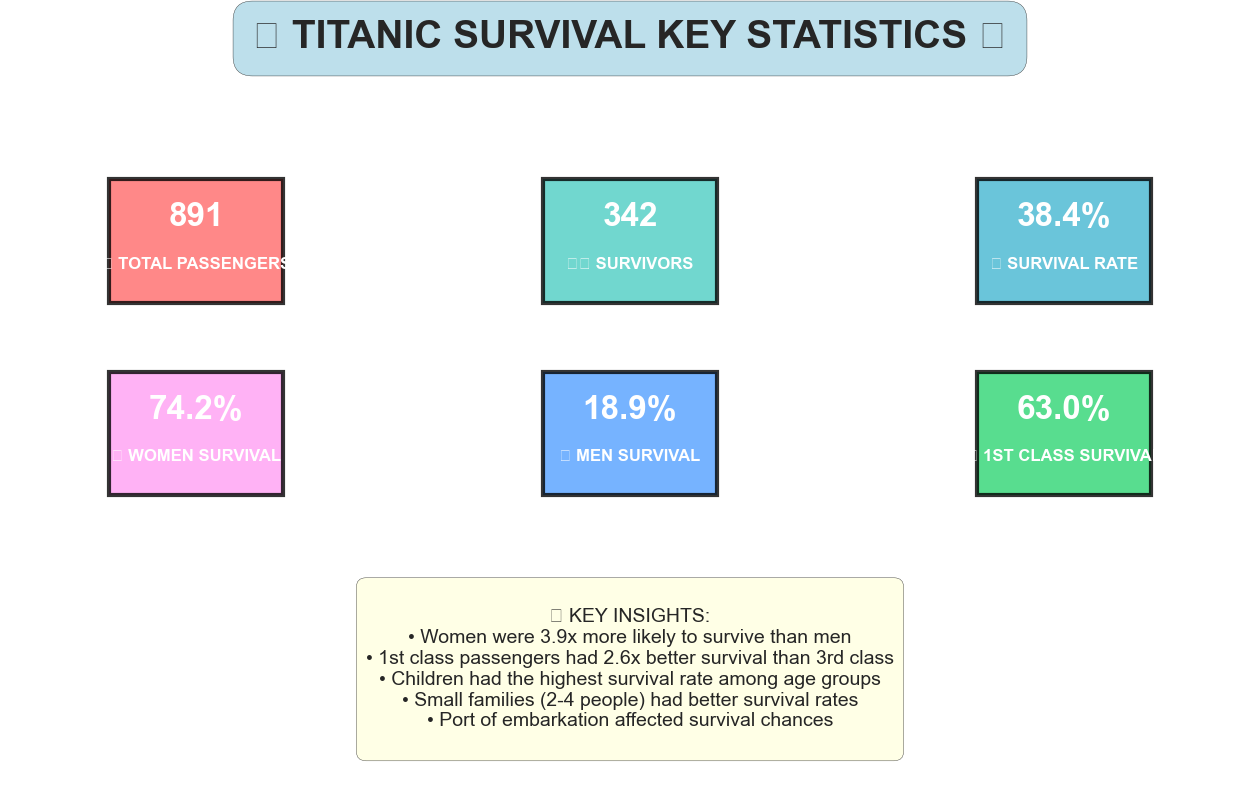

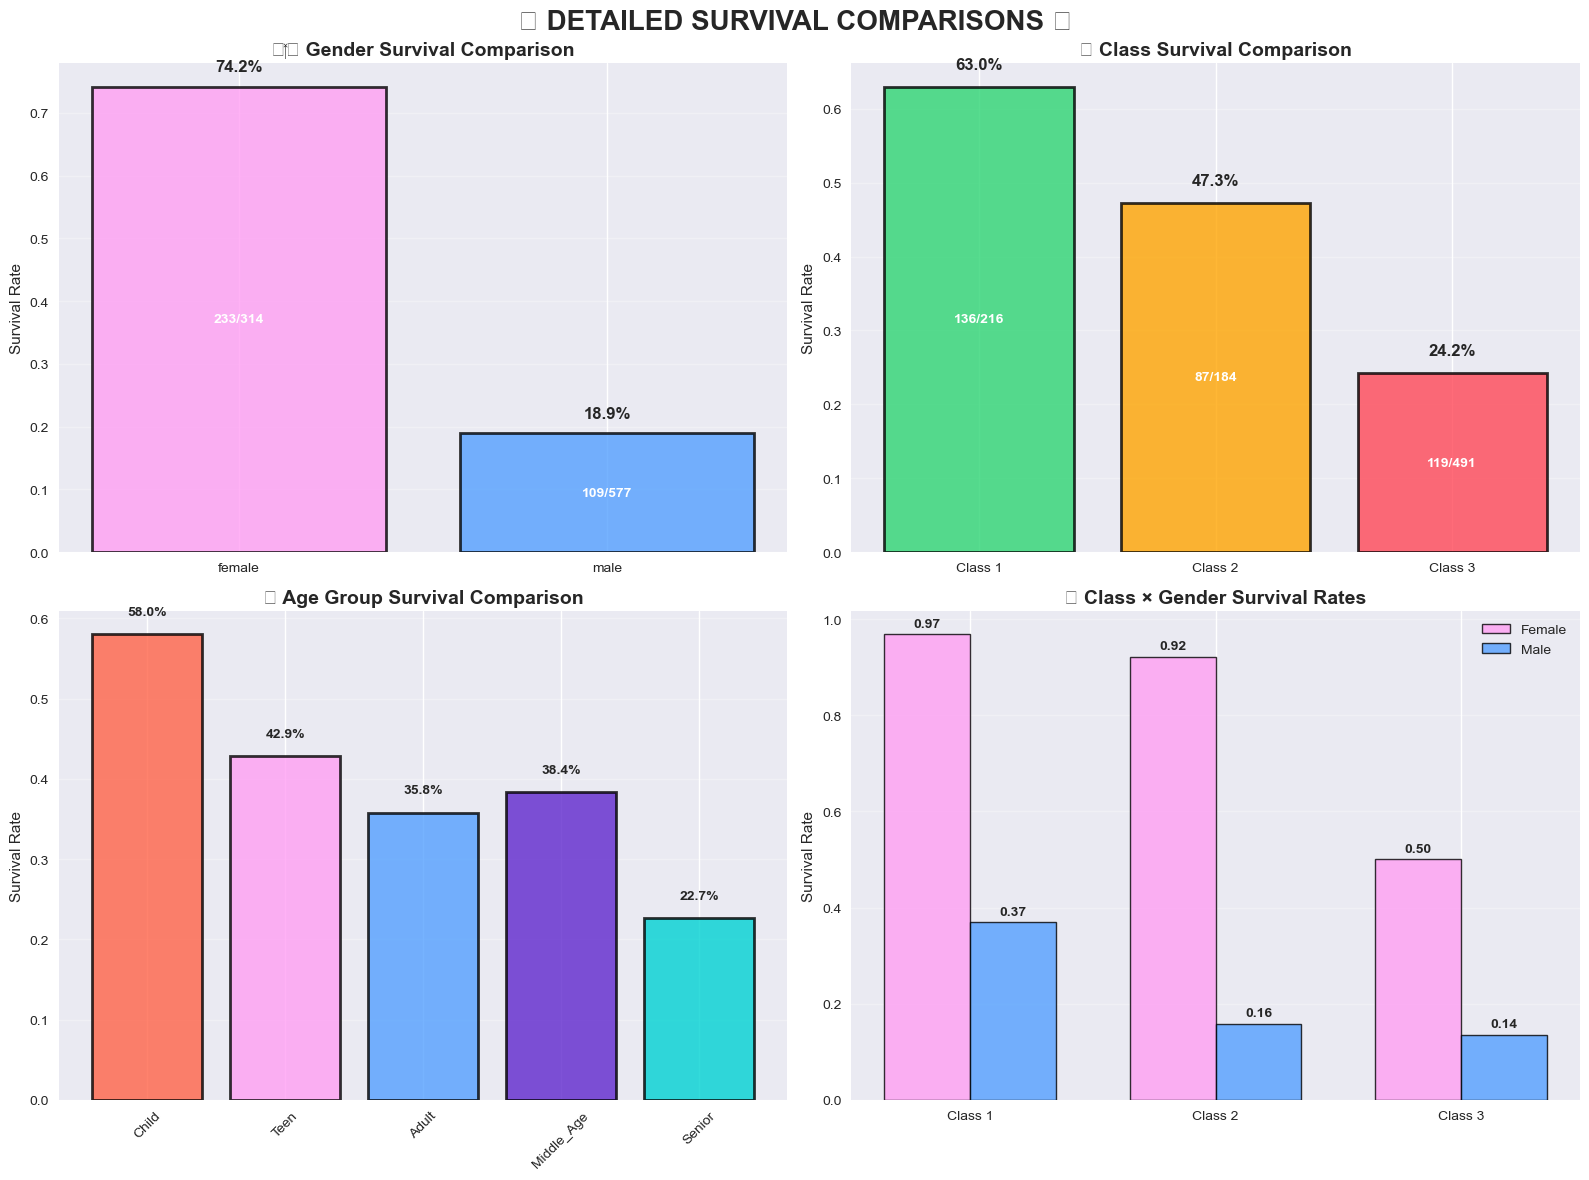

In [12]:
# Enhanced Graphical Visualizations for Titanic Analysis
# =====================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

# Set enhanced styling
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

# =====================================
# 1. STUNNING SURVIVAL OVERVIEW DASHBOARD
# =====================================

fig = plt.figure(figsize=(20, 12))
fig.suptitle('🚢 TITANIC SURVIVAL ANALYSIS DASHBOARD 🚢', fontsize=24, fontweight='bold', y=0.98)

# Overall Survival Rate - Big Circle Chart
plt.subplot(2, 4, 1)
survived_count = df_clean['Survived'].sum()
total_count = len(df_clean)
died_count = total_count - survived_count

# Create pie chart with explosion
explode = (0.1, 0)
colors = ['#ff6b6b', '#4ecdc4']
sizes = [died_count, survived_count]
labels = [f'Died\n({died_count})', f'Survived\n({survived_count})']

wedges, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
                                  autopct='%1.1f%%', shadow=True, startangle=90,
                                  textprops={'fontsize': 12, 'fontweight': 'bold'})

plt.title('⚰️ Overall Survival Rate ⛑️', fontsize=16, fontweight='bold', pad=20)

# Gender Survival - Enhanced Bar Chart
plt.subplot(2, 4, 2)
gender_survival = df_clean.groupby('Sex')['Survived'].mean()
bars = plt.bar(gender_survival.index, gender_survival.values, 
               color=['#ff9ff3', '#54a0ff'], alpha=0.8, edgecolor='black', linewidth=2)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height:.1%}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.title('👨‍👩 Survival by Gender 👨‍👩', fontsize=14, fontweight='bold')
plt.ylabel('Survival Rate', fontweight='bold')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

# Class Survival - Gradient Bar Chart
plt.subplot(2, 4, 3)
class_survival = df_clean.groupby('Pclass')['Survived'].mean()
colors_class = ['#2ed573', '#ffa502', '#ff4757']
bars = plt.bar([f'Class {i}' for i in class_survival.index], class_survival.values,
               color=colors_class, alpha=0.8, edgecolor='black', linewidth=2)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height:.1%}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.title('🎭 Survival by Class 🎭', fontsize=14, fontweight='bold')
plt.ylabel('Survival Rate', fontweight='bold')
plt.ylim(0, 0.8)
plt.grid(axis='y', alpha=0.3)

# Age Group Survival - Colorful Chart
plt.subplot(2, 4, 4)
age_survival = df_clean.groupby('Age_Group')['Survived'].mean()
colors_age = ['#ff6348', '#ff9ff3', '#54a0ff', '#5f27cd', '#00d2d3']
bars = plt.bar(range(len(age_survival)), age_survival.values,
               color=colors_age, alpha=0.8, edgecolor='black', linewidth=2)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height:.1%}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.title('👶 Survival by Age Group 👴', fontsize=14, fontweight='bold')
plt.ylabel('Survival Rate', fontweight='bold')
plt.xticks(range(len(age_survival)), age_survival.index, rotation=45)
plt.ylim(0, 0.7)
plt.grid(axis='y', alpha=0.3)

# Family Size vs Survival - Bubble Chart
plt.subplot(2, 4, 5)
family_survival = df_clean.groupby('Family_Size').agg({
    'Survived': ['mean', 'count']
}).round(3)
family_survival.columns = ['survival_rate', 'count']

scatter = plt.scatter(family_survival.index, family_survival['survival_rate'],
                     s=family_survival['count']*10, alpha=0.6, 
                     c=family_survival['survival_rate'], cmap='RdYlGn',
                     edgecolors='black', linewidth=2)

plt.colorbar(scatter, label='Survival Rate')
plt.title('👨‍👩‍👧‍👦 Family Size Impact 👨‍👩‍👧‍👦', fontsize=14, fontweight='bold')
plt.xlabel('Family Size', fontweight='bold')
plt.ylabel('Survival Rate', fontweight='bold')
plt.grid(alpha=0.3)

# Port of Embarkation - Donut Chart
plt.subplot(2, 4, 6)
embarked_survival = df_clean.groupby('Embarked')['Survived'].mean()
colors_port = ['#ff6b6b', '#4ecdc4', '#45b7d1']

# Fix the unpacking issue
pie_result = plt.pie(embarked_survival.values, labels=embarked_survival.index,
                    colors=colors_port, autopct='%1.1f%%', 
                    pctdistance=0.85, textprops={'fontweight': 'bold'})

# Create donut effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('🚢 Survival by Port 🚢', fontsize=14, fontweight='bold', pad=20)

# Fare vs Survival - Violin Plot
plt.subplot(2, 4, 7)
sns.violinplot(data=df_clean, x='Survived', y='Fare', palette=['#ff6b6b', '#4ecdc4'])
plt.title('💰 Fare vs Survival 💰', fontsize=14, fontweight='bold')
plt.xlabel('Survived (0=No, 1=Yes)', fontweight='bold')
plt.ylabel('Fare ($)', fontweight='bold')

# Class and Gender Heatmap
plt.subplot(2, 4, 8)
pivot_survival = df_clean.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
sns.heatmap(pivot_survival, annot=True, cmap='RdYlGn', cbar_kws={'label': 'Survival Rate'},
            fmt='.2f', linewidths=2, square=True)
plt.title('🔥 Class × Gender Heatmap 🔥', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# =====================================

# =====================================

fig, ax = plt.subplots(1, 1, figsize=(16, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Title
ax.text(5, 9.5, '🚢 TITANIC SURVIVAL KEY STATISTICS 🚢', 
        fontsize=28, fontweight='bold', ha='center',
        bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', alpha=0.8))

# Create colorful boxes for key stats
stats_data = [
    {"title": "👥 TOTAL PASSENGERS", "value": f"{len(df_clean)}", "color": "#ff6b6b"},
    {"title": "⛑️ SURVIVORS", "value": f"{df_clean['Survived'].sum()}", "color": "#4ecdc4"},
    {"title": "📊 SURVIVAL RATE", "value": f"{df_clean['Survived'].mean():.1%}", "color": "#45b7d1"},
    {"title": "👩 WOMEN SURVIVAL", "value": "74.2%", "color": "#ff9ff3"},
    {"title": "👨 MEN SURVIVAL", "value": "18.9%", "color": "#54a0ff"},
    {"title": "🏆 1ST CLASS SURVIVAL", "value": "63.0%", "color": "#2ed573"}
]

positions = [(1.5, 7), (5, 7), (8.5, 7), (1.5, 4.5), (5, 4.5), (8.5, 4.5)]

for i, (stat, pos) in enumerate(zip(stats_data, positions)):
    # Create rectangle
    rect = Rectangle((pos[0]-0.7, pos[1]-0.8), 1.4, 1.6, 
                    facecolor=stat["color"], alpha=0.8, edgecolor='black', linewidth=3)
    ax.add_patch(rect)
    
    # Add text
    ax.text(pos[0], pos[1]+0.3, stat["value"], fontsize=24, fontweight='bold', 
            ha='center', va='center', color='white')
    ax.text(pos[0], pos[1]-0.3, stat["title"], fontsize=12, fontweight='bold', 
            ha='center', va='center', color='white')

# Add key insights
insights_text = """
🔥 KEY INSIGHTS:
• Women were 3.9x more likely to survive than men
• 1st class passengers had 2.6x better survival than 3rd class
• Children had the highest survival rate among age groups
• Small families (2-4 people) had better survival rates
• Port of embarkation affected survival chances
"""

ax.text(5, 2.5, insights_text, fontsize=14, ha='center', va='top',
        bbox=dict(boxstyle="round,pad=0.5", facecolor='lightyellow', alpha=0.8))

plt.show()

# =====================================
# 3. INTERACTIVE-STYLE COMPARISON CHARTS
# =====================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 DETAILED SURVIVAL COMPARISONS 📊', fontsize=20, fontweight='bold')

# Gender comparison with enhanced styling
ax1 = axes[0, 0]
gender_data = df_clean.groupby('Sex').agg({
    'Survived': ['count', 'sum', 'mean']
}).round(3)
gender_data.columns = ['Total', 'Survived', 'Rate']

bars1 = ax1.bar(range(len(gender_data)), gender_data['Rate'], 
               color=['#ff9ff3', '#54a0ff'], alpha=0.8, edgecolor='black', linewidth=2)

# Add value labels and counts
for i, (idx, row) in enumerate(gender_data.iterrows()):
    ax1.text(i, row['Rate'] + 0.02, f'{row["Rate"]:.1%}', 
            ha='center', va='bottom', fontweight='bold', fontsize=12)
    ax1.text(i, row['Rate']/2, f'{int(row["Survived"])}/{int(row["Total"])}', 
            ha='center', va='center', fontweight='bold', fontsize=10, color='white')

ax1.set_title('👨‍👩 Gender Survival Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(range(len(gender_data)))
ax1.set_xticklabels(gender_data.index)
ax1.set_ylabel('Survival Rate')
ax1.grid(axis='y', alpha=0.3)

# Class comparison
ax2 = axes[0, 1]
class_data = df_clean.groupby('Pclass').agg({
    'Survived': ['count', 'sum', 'mean']
}).round(3)
class_data.columns = ['Total', 'Survived', 'Rate']

bars2 = ax2.bar(range(len(class_data)), class_data['Rate'], 
               color=['#2ed573', '#ffa502', '#ff4757'], alpha=0.8, edgecolor='black', linewidth=2)

for i, (idx, row) in enumerate(class_data.iterrows()):
    ax2.text(i, row['Rate'] + 0.02, f'{row["Rate"]:.1%}', 
            ha='center', va='bottom', fontweight='bold', fontsize=12)
    ax2.text(i, row['Rate']/2, f'{int(row["Survived"])}/{int(row["Total"])}', 
            ha='center', va='center', fontweight='bold', fontsize=10, color='white')

ax2.set_title('🎭 Class Survival Comparison', fontsize=14, fontweight='bold')
ax2.set_xticks(range(len(class_data)))
ax2.set_xticklabels([f'Class {i}' for i in class_data.index])
ax2.set_ylabel('Survival Rate')
ax2.grid(axis='y', alpha=0.3)

# Age group comparison
ax3 = axes[1, 0]
age_data = df_clean.groupby('Age_Group').agg({
    'Survived': ['count', 'sum', 'mean']
}).round(3)
age_data.columns = ['Total', 'Survived', 'Rate']

bars3 = ax3.bar(range(len(age_data)), age_data['Rate'], 
               color=['#ff6348', '#ff9ff3', '#54a0ff', '#5f27cd', '#00d2d3'], 
               alpha=0.8, edgecolor='black', linewidth=2)

for i, (idx, row) in enumerate(age_data.iterrows()):
    ax3.text(i, row['Rate'] + 0.02, f'{row["Rate"]:.1%}', 
            ha='center', va='bottom', fontweight='bold', fontsize=10)

ax3.set_title('👶 Age Group Survival Comparison', fontsize=14, fontweight='bold')
ax3.set_xticks(range(len(age_data)))
ax3.set_xticklabels(age_data.index, rotation=45)
ax3.set_ylabel('Survival Rate')
ax3.grid(axis='y', alpha=0.3)

# Combined Class + Gender
ax4 = axes[1, 1]
combined_data = df_clean.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

# Create grouped bar chart
x = np.arange(len(combined_data.index))
width = 0.35

bars_f = ax4.bar(x - width/2, combined_data['female'], width, label='Female', 
                color='#ff9ff3', alpha=0.8, edgecolor='black', linewidth=1)
bars_m = ax4.bar(x + width/2, combined_data['male'], width, label='Male', 
                color='#54a0ff', alpha=0.8, edgecolor='black', linewidth=1)

# Add value labels
for bars in [bars_f, bars_m]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

ax4.set_title('🔥 Class × Gender Survival Rates', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels([f'Class {i}' for i in combined_data.index])
ax4.set_ylabel('Survival Rate')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
